## Installing satellite image preprocessing library rasterio

In [6]:
!pip install rasterio
!python -m pip install ipykernel
!python -m ipykernel install

Installed kernelspec python3 in C:\ProgramData\jupyter\kernels\python3


## Importing libraries

In [84]:
import rasterio
from rasterio import plot
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio.plot
import numpy as np
import warnings
import os
import gdal
warnings.filterwarnings("ignore")

### Defining path of images of all bands

In [85]:
path = ".//data//"

In [86]:
band1 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Coastal aerosol        
band2 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Blue
band3 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Green
band4 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Red
band5 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Near Infrared(NIR)
band6 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # SWIR 1
band7 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # SWIR 2
band8 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Panchromatic
band9 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"   # Cirrus
band10 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"  # Thermal Infrared(TIRS) 1
band11 = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"  # Thermal Infrared(TIRS) 2

### Read and print metadata

In [87]:
def sat_image_description(band):
    satimg = rasterio.open(band)
    

In [88]:
satimg = rasterio.open(band1)

In [89]:
print(satimg)

<open DatasetReader name='.//data//LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF' mode='r'>


In [90]:
print(satimg.name)

.//data//LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF


In [91]:
print(satimg.count)

1


In [92]:
print(satimg.index)

<bound method TransformMethodsMixin.index of <open DatasetReader name='.//data//LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF' mode='r'>>


In [93]:
blue = satimg.read()

In [94]:
print(blue.dtype)

uint16


In [95]:
w = blue.shape[2]
h = blue.shape[1]

In [96]:
blue.shape

(1, 7821, 7671)

In [97]:
print(w,h)

7671 7821


In [98]:
satimg.bounds

BoundingBox(left=237285.0, bottom=2438985.0, right=467415.0, top=2673615.0)

In [99]:
name = "band5"
move_loc = "C://Users//boltuzamaki//Desktop//IP project finalize//"+ name


### Break down single image into multiple image for easy fitting in RAM

In [103]:
from rasterio.mask import mask
import os
import shutil
import shutil
# For band 2, 3 and 4 make separately 
os.mkdir(name)
satimg = rasterio.open(band4)
width_crop = (satimg.bounds.right  - satimg.bounds.left)/10
height_crop = (satimg.bounds.top - satimg.bounds.bottom)/10
top_left_x = satimg.bounds.left
top_left_y = satimg.bounds.top


for i in range(0,10):
    top_left_x = top_left_x + width_crop
    top_left_y = satimg.bounds.top
    for j in range(0,11):
        # print(left, top)
        arr = [[(top_left_x,top_left_y),
           (top_left_x + width_crop,top_left_y),
           (top_left_x+width_crop,top_left_y-height_crop),
           (top_left_x,top_left_y-height_crop)]]
        dicto = [{'type':'Polygon',
         'coordinates': arr}] 
        print(dicto)
        top_left_y = top_left_y - height_crop
        try:
            with rasterio.open(band4) as img:
                clipped, transform = mask(img, dicto, crop = True)
                meta = img.meta.copy()
                meta.update({"transform": transform,
                "height":clipped.shape[1],
                 "width":clipped.shape[2]
                })
            file_name = "img"+str(i)+str(j)+".tif"    
            with rasterio.open(file_name,'w',**meta) as dst:
                dst.write(clipped)
            shutil.move(file_name,move_loc)        
        except:
            print("Next entry.")
    
        #print(clipped.shape)    

[{'type': 'Polygon', 'coordinates': [[(260298.0, 2673615.0), (283311.0, 2673615.0), (283311.0, 2650152.0), (260298.0, 2650152.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(260298.0, 2650152.0), (283311.0, 2650152.0), (283311.0, 2626689.0), (260298.0, 2626689.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(260298.0, 2626689.0), (283311.0, 2626689.0), (283311.0, 2603226.0), (260298.0, 2603226.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(260298.0, 2603226.0), (283311.0, 2603226.0), (283311.0, 2579763.0), (260298.0, 2579763.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(260298.0, 2579763.0), (283311.0, 2579763.0), (283311.0, 2556300.0), (260298.0, 2556300.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(260298.0, 2556300.0), (283311.0, 2556300.0), (283311.0, 2532837.0), (260298.0, 2532837.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(260298.0, 2532837.0), (283311.0, 2532837.0), (283311.0, 2509374.0), (260298.0, 2509374.0)]]

Next entry.
[{'type': 'Polygon', 'coordinates': [[(375363.0, 2556300.0), (398376.0, 2556300.0), (398376.0, 2532837.0), (375363.0, 2532837.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(375363.0, 2532837.0), (398376.0, 2532837.0), (398376.0, 2509374.0), (375363.0, 2509374.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(375363.0, 2509374.0), (398376.0, 2509374.0), (398376.0, 2485911.0), (375363.0, 2485911.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(375363.0, 2485911.0), (398376.0, 2485911.0), (398376.0, 2462448.0), (375363.0, 2462448.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(375363.0, 2462448.0), (398376.0, 2462448.0), (398376.0, 2438985.0), (375363.0, 2438985.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(375363.0, 2438985.0), (398376.0, 2438985.0), (398376.0, 2415522.0), (375363.0, 2415522.0)]]}]
Next entry.
[{'type': 'Polygon', 'coordinates': [[(398376.0, 2673615.0), (421389.0, 2673615.0), (421389.0, 2650152.0), (398376.0, 

### Showing the image

1
768
783


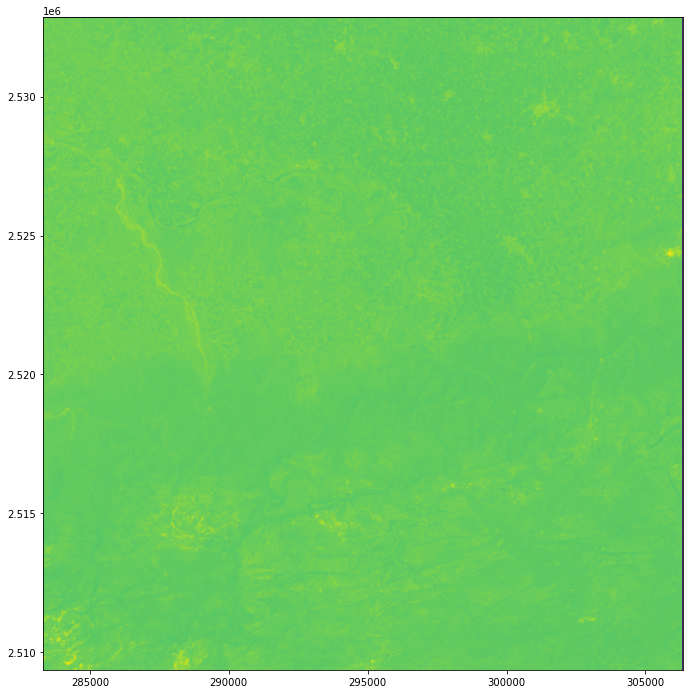

<Figure size 432x288 with 0 Axes>

In [60]:
band1 = rasterio.open(".//band5//img16.tif") 
print(band1.count)
print(band1.width)
print(band1.height)
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show(band1)
plt.show()
plt.savefig("cropped.png")

In [61]:
width_in_projected_units = satimg.bounds.right  - satimg.bounds.left
height_in_projected_units = satimg.bounds.top - satimg.bounds.bottom

In [62]:
print(width_in_projected_units, height_in_projected_units)

230130.0 234630.0


In [63]:
satimg.transform * (satimg.width, satimg.height)

(467415.0, 2438985.0)

### Co-ordinate transformation

In [64]:
satimg.crs

CRS.from_epsg(32644)

In [65]:
row_min = 0
col_min = 0


row_max = satimg.height - 1
col_max = satimg.width -1

topleft = satimg.transform * (row_min, col_min)
botright = satimg.transform * (row_max, col_max)


print(topleft, botright)

(237285.0, 2673615.0) (471885.0, 2443515.0)


In [66]:
satimg.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7671, 'height': 7821, 'count': 1, 'crs': CRS.from_epsg(32644), 'transform': Affine(30.0, 0.0, 237285.0,
       0.0, -30.0, 2673615.0), 'tiled': False, 'interleave': 'band'}

In [67]:
file = path + "LC08_L1TP_144044_20200502_20200509_01_T1_B1.TIF"
ds = gdal.Open(file)
band = ds.GetRasterBand(1)
arr = band.ReadAsArray()


In [55]:
plt.savefig('books_read.png')
!pip install opencv-python

<Figure size 432x288 with 0 Axes>

In [68]:
with rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B2.TIF") as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7671, 'height': 7821, 'count': 1, 'crs': CRS.from_epsg(32644), 'transform': Affine(30.0, 0.0, 237285.0,
       0.0, -30.0, 2673615.0), 'tiled': False, 'interleave': 'band'}


### Visualization of different bands of satellite image 

1
7671
7821


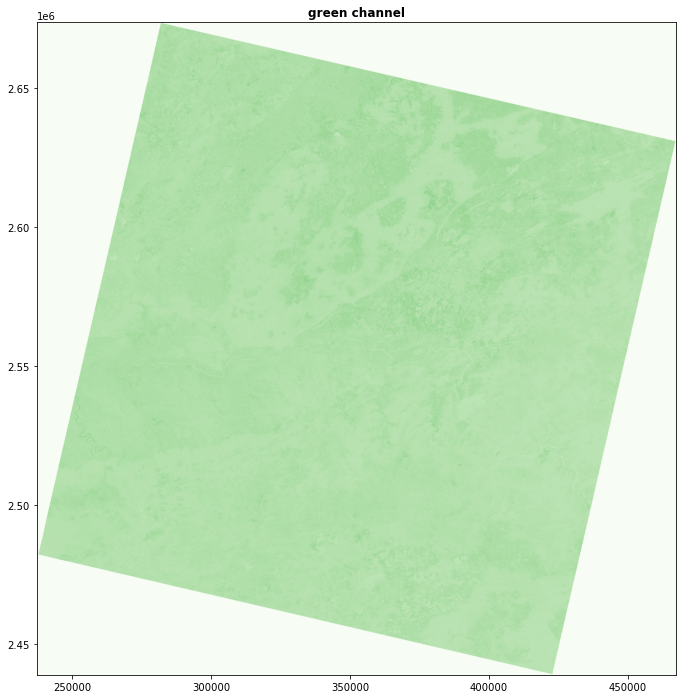

In [70]:
band3 = rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B3.TIF") 
print(band3.count)
print(band3.width)
print(band3.height)
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show(
band1,cmap='Greens', title='green channel')
plt.show()

1
7671
7821


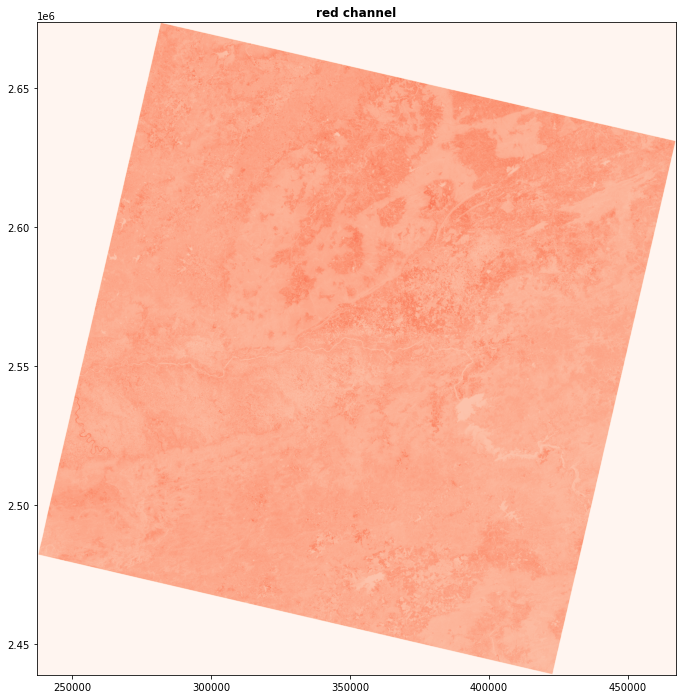

In [71]:
band4 = rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B4.TIF") 
print(band4.count)
print(band4.width)
print(band4.height)
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show(band1,cmap='Reds', title='red channel')
plt.show()

1
7671
7821


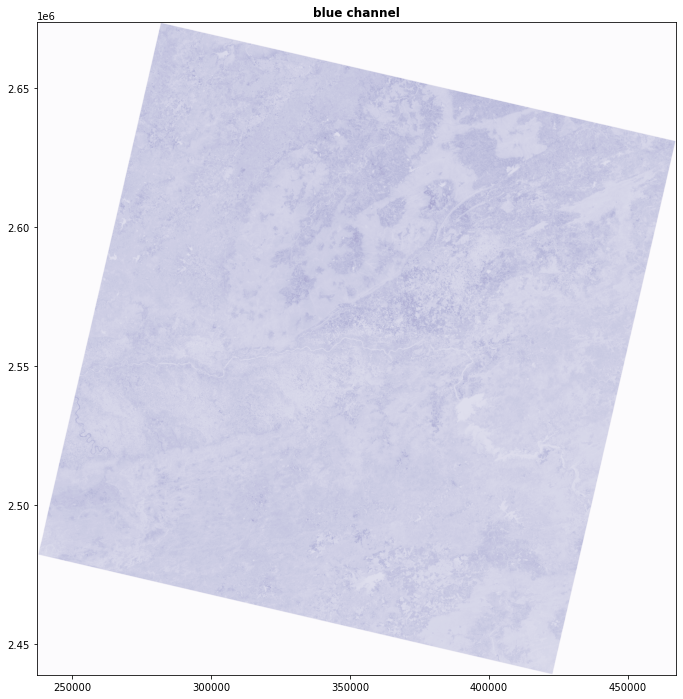

<Figure size 432x288 with 0 Axes>

In [74]:
band2 = rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B4.TIF") 
print(band2.count)
print(band2.width)
print(band2.height)
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show(band1,cmap='Purples', title='blue channel')
plt.show()

# Creating RGB image using band R,B and G and creating NDVI images using band R and NIR

In [121]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

band1 = rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B2.TIF")
band1_arr = band1.read(1)

blue_crop = band1_arr[6000:6050, 6000:6050]

In [122]:
from rasterio.windows import Window

In [123]:
Window.from_slices(slice(None), slice(None), height=100, width=100)

Window(col_off=0.0, row_off=0.0, width=100.0, height=100.0)

In [124]:
red_crop = band1_arr[6000:6050, 6000:6050]
green_crop = band1_arr[6000:6050, 6000:6050]
blue_crop = band1_arr[6000:6050, 6000:6050]

In [125]:
blue_crop.shape

(50, 50)

In [126]:
green = rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B3.TIF")
blue = rasterio.open(path + "LC08_L1TP_144044_20200502_20200509_01_T1_B2.TIF")

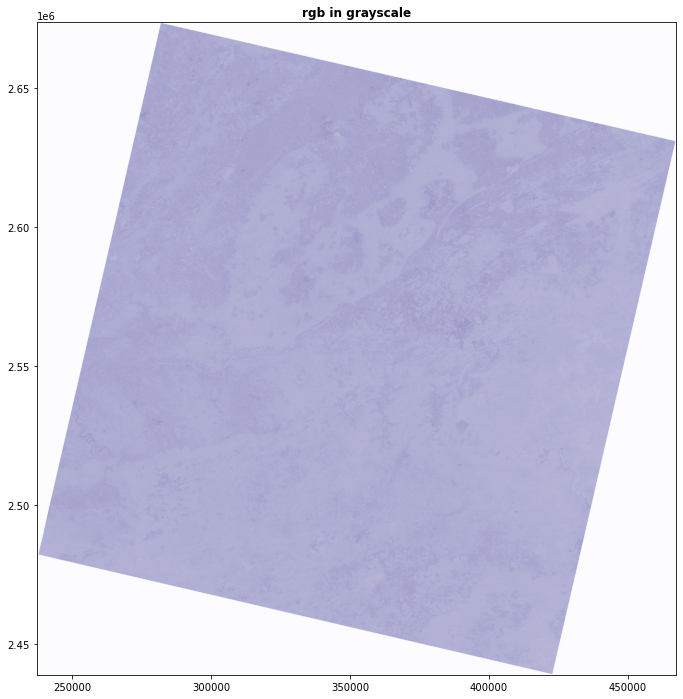

In [131]:
green = rasterio.open(".//band3//img25.tif")
blue = rasterio.open(".//band2//img25.tif")
red = rasterio.open(".//band4//img25.tif")

green_crop = green.read(1)
blue_crop = blue.read(1)
red_crop = red.read(1)

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)


# Normalize band DN
red_norm = normalize(red_crop)
green_norm = normalize(green_crop)
blue_ban = normalize(blue_crop)

# Stack bands
nrg = np.dstack((red_norm, green_norm, blue_ban))

fig, ax = plt.subplots(1, figsize=(12, 12))
# View the color composite
plot.show(band1,cmap='Purples', title='rgb in grayscale')
plt.show()

In [132]:
nir = rasterio.open(band5)
red = rasterio.open(band4)
nir = nir.read(1)
red = red.read(1)

Text(0, 0.5, 'Row #')

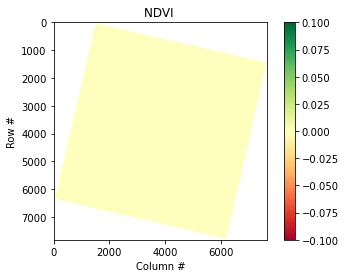

In [133]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(nir,red)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI ')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [108]:
green.shape

(783, 768)

In [109]:
green.bounds

BoundingBox(left=306315.0, bottom=2532825.0, right=329355.0, top=2556315.0)

In [110]:
blue.shape

(783, 768)

In [111]:
blue.bounds

BoundingBox(left=306315.0, bottom=2532825.0, right=329355.0, top=2556315.0)

In [113]:
red.shape

(7821, 7671)